In [ ]:
#in His Name

In [ ]:
pip install newspaper3k beautifulsoup4 requests

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 43.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.1/211.1 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.3/106.3 kB 6.3 MB/s eta 0:00:00
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13540 sha256=0ed51093e7b9fea8fb1361501c7519cf1a85eb9880ab63bda743558ce959e083
  Stored in directory: /root/.cache/pip/wheels/fc/ab/f8/cce3a9ae6d828bd346be695f7ff54612cd22b7cbd7208d68f3
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-py3-none-any.whl size=3341 sha256=85b652263f7a9184bd97a636e99327517b38f67161f7c1304fb6b7df5698150a
  Stored in directory: /root/.cache/pip/wheels/80/d5/72/9cd9eccc819636436c6a6e59c22a0fb1ec1

In [ ]:
pip install lxml_html_clean

In [ ]:
def contains_keywords(text, keywords):

    text = text.lower()
    return all(kw in text for kw in keywords)

def sanctions_on_filter(text):

    text_lower = text.lower()
    base_keywords = ["economic", "sanction", "against", "iran"]
    if "lift" in text_lower:
        return False
    return contains_keywords(text, base_keywords)

def sanctions_off_filter(text):

    text_lower = text.lower()
    base_keywords = ["economic", "sanction", "against", "iran"]
    additional_keywords = ["lift", "waive", "accord"]
    if contains_keywords(text, base_keywords) and any(kw in text_lower for kw in additional_keywords):
        return True
    return False


In [ ]:
import newspaper

def process_site(site_name, site_url):

    print(f"Processing {site_name} ...")

    paper = newspaper.build(site_url, memoize_articles=False)
    total_articles = len(paper.articles)

    count_sanctions_on = 0
    count_sanctions_off = 0

    for i, article in enumerate(paper.articles):
        try:
            article.download()
            article.parse()
            text = article.text
            if sanctions_on_filter(text):
                count_sanctions_on += 1
            if sanctions_off_filter(text):
                count_sanctions_off += 1
        except Exception as e:
            print(f"Error processing an article: {e}")


    return paper, total_articles, count_sanctions_on, count_sanctions_off


In [ ]:
if __name__ == "__main__":
    websites = {
        "Financial Times": "https://www.ft.com",
        "Los Angeles Times": "https://www.latimes.com",
        "New York Times": "https://www.nytimes.com",
        "The Washington Post": "https://www.washingtonpost.com",
        "Wall Street Journal": "https://www.wsj.com",
        "The Guardian": "https://www.theguardian.com"
    }

    results = {}

    for site_name, site_url in websites.items():
        _, total, sanctions_on_count, sanctions_off_count = process_site(site_name, site_url)
        results[site_name] = {
            "Total Articles": total,
            "Sanctions On": sanctions_on_count,
            "Sanctions Off": sanctions_off_count
        }

    for site, stats in results.items():
        print(f"\nSite: {site}")
        for key, value in stats.items():
            print(f"  {key}: {value}")


In [ ]:
paper, total, sanctions_on_count, sanctions_off_count = process_site("The Guardian", "https://www.theguardian.com")

Processing The Guardian ...


CRITICAL:newspaper.network:[REQUEST FAILED] 404 Client Error: Not Found for url: https://www.theguardian.com/feed
CRITICAL:newspaper.network:[REQUEST FAILED] 404 Client Error: Not Found for url: https://www.theguardian.com/feeds


Error processing an article: Article `download()` failed with 403 Client Error: Forbidden for url: https://theguardian.newspapers.com/article/the-guardian/170434350/ on URL https://theguardian.newspapers.com/article/the-guardian/170434350/
Error processing an article: Article `download()` failed with 403 Client Error: Forbidden for url: https://theguardian.newspapers.com/article/the-guardian/170434303/ on URL https://theguardian.newspapers.com/article/the-guardian/170434303/
Error processing an article: Article `download()` failed with 403 Client Error: Forbidden for url: https://theguardian.newspapers.com/article/the-guardian-end-of-italys-east-african/170430715/ on URL https://theguardian.newspapers.com/article/the-guardian-end-of-italys-east-african/170430715/


In [ ]:
total

901

In [ ]:
a = []
for i in paper.articles:
  a.append(i.publish_date)

In [ ]:
import pandas as pd
a = pd.DataFrame(a)
a[0] = pd.to_datetime(a[0])
a.sort_values(0)

,0
459,2010-02-09
458,2013-10-28
225,2014-06-24
226,2015-05-11
39,2015-05-11
...,...
560,NaT
566,NaT
570,NaT
571,NaT


<Axes: xlabel='0'>

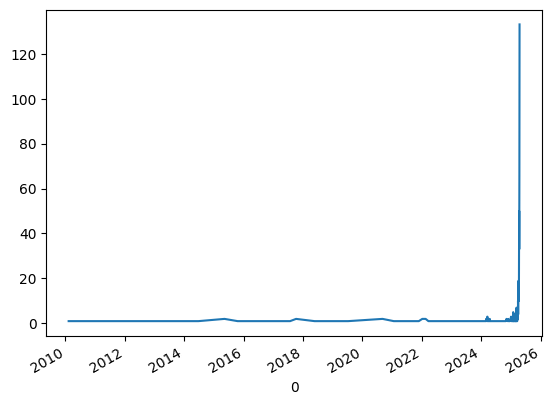

In [ ]:
a[0].value_counts().sort_index().dropna().plot()

In [ ]:
for i, article in enumerate(paper.articles):
  try:
    article.download()
    article.parse()
    text = article.text
    if sanctions_on_filter(text):
      print(text)
      count_sanctions_on += 1
    if sanctions_off_filter(text):
      print(text)
      count_sanctions_off += 1
  except Exception as e:
    print(f"Error processing an article: {e}")

Error processing an article: Article `download()` failed with 403 Client Error: Forbidden for url: https://theguardian.newspapers.com/article/the-guardian/170434350/ on URL https://theguardian.newspapers.com/article/the-guardian/170434350/
Error processing an article: Article `download()` failed with 403 Client Error: Forbidden for url: https://theguardian.newspapers.com/article/the-guardian/170434303/ on URL https://theguardian.newspapers.com/article/the-guardian/170434303/
Error processing an article: Article `download()` failed with 403 Client Error: Forbidden for url: https://theguardian.newspapers.com/article/the-guardian-end-of-italys-east-african/170430715/ on URL https://theguardian.newspapers.com/article/the-guardian-end-of-italys-east-african/170430715/
